In [1]:
url="https://archive.ics.uci.edu/dataset/45/heart+disease"

In [2]:
library(tidyverse)
library(repr)
library(tidymodels)
library(janitor)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.4     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

#  Presence of heart disease of patients in Cleveland, Ohio

## Introduction

Heart disease is the leading cause of death in the United States, and one of every five deaths in the United States can be attributed to heart disease (Multiple Cause of Death Data on CDC WONDER, n.d.). This makes the quick and accurate diagnosis of heart disease an extremely important topic of study. In 1989, a probability algorithm was created for the diagnosis of coronary artery disease (Detrano et al., 1989). In their report, they tested their algorithm on the test results of 303 patients from the Cleveland Clinic. 
Here, we will use two criteria commonly associated with heart disease to predict the presence of it in the sample group of patients.  Cholesterol levels can increase the risk of heart disease and can be easily tested for during routine blood tests, making it an important variable to predict the presence of heart disease (High Cholesterol - Symptoms and Causes - Mayo Clinic, n.d.). The second variable we chose was resting blood pressure. High blood pressure, also known as hypertension can lead to heart disease and can be easily tested at home or during regular checkups (CDC, 2023). 
Using these two routinely checked variables, we will determine if the presence of heart disease can be predicted in patients in Cleveland, Ohio using the method of classification.
The heart disease dataset that will be used in our analysis has a sample size of 303 patients, and has 14 variables. However, as mentioned previously, we will only be using two variables (cholesterol levels and resting blood pressure) to see if a quick determination of the presence of heart disease can be made through routinely checked criteria. The sample group is patients from Cleaveland Clinic in Ohio. The sample set includes both male and female patients with an average age of 54. (Janosi, 1988). 


### Initial Data

In [3]:
set.seed(1234)
main_data_column_2 <- read_table("cleve.mod", col_names = c('Age', 'Sex', 'Chest Pain Type', 'Resting Blood Pressure',
                                                            'Cholesterol', 'Fasting Blood Sugar <120',
                                                        'Resting ECG Reading', 'Max Heart Rate',
                                                       'Exercise Induced Angina (TRUE or FALSE)',
                                                            'Old Peak', 'Slope', 'Number Of Vessels Coloured', 'thal','Health'), skip = 20)

heart_data<-clean_names(main_data_column_2)
heart_data <- heart_data |>
        mutate(health = as_factor(health))




── Column specification ────────────────────────────────────────────────────────
cols(
  Age = col_double(),
  Sex = col_character(),
  `Chest Pain Type` = col_character(),
  `Resting Blood Pressure` = col_double(),
  Cholesterol = col_double(),
  `Fasting Blood Sugar <120` = col_character(),
  `Resting ECG Reading` = col_character(),
  `Max Heart Rate` = col_double(),
  `Exercise Induced Angina (TRUE or FALSE)` = col_character(),
  `Old Peak` = col_double(),
  Slope = col_character(),
  `Number Of Vessels Coloured` = col_character(),
  thal = col_character(),
  Health = col_character()
)

Warning message:
“303 parsing failures.
row col   expected     actual        file
  1  -- 14 columns 15 columns 'cleve.mod'
  2  -- 14 columns 15 columns 'cleve.mod'
  3  -- 14 columns 15 columns 'cleve.mod'
  4  -- 14 columns 15 columns 'cleve.mod'
  5  -- 14 columns 15 columns 'cleve.mod'
... ... .......... .......... ...........
See problems(...) for more details.
”


age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar_120,resting_ecg_reading,max_heart_rate,exercise_induced_angina_true_or_false,old_peak,slope,number_of_vessels_coloured,thal,health
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<fct>
63,male,angina,145,233,true,hyp,150,fal,2.3,down,0.0,fix,buff
67,male,asympt,160,286,fal,hyp,108,true,1.5,flat,3.0,norm,sick
67,male,asympt,120,229,fal,hyp,129,true,2.6,flat,2.0,rev,sick
37,male,notang,130,250,fal,norm,187,fal,3.5,down,0.0,norm,buff
41,fem,abnang,130,204,fal,hyp,172,fal,1.4,up,0.0,norm,buff
56,male,abnang,120,236,fal,norm,178,fal,0.8,up,0.0,norm,buff


#### Figure 1.0

In [ ]:
head(heart_data)

### Summary Data

In [4]:
num_obs <- heart_data |>
    group_by(health) |>
    summarize(counts = n())


predictor_means<-heart_data|>
    select(resting_blood_pressure,cholesterol)|>
    summarize(across(resting_blood_pressure:cholesterol,mean))


health,counts
<fct>,<int>
buff,165
sick,138


resting_blood_pressure,cholesterol
<dbl>,<dbl>
131.6238,246.264


#### Figure 1.1

In [ ]:
num_obs

#### Figure 1.2

In [2]:
predictor_means

ERROR: Error in eval(expr, envir, enclos): object 'predictor_means' not found


### Initial Visualization

sex,resting_blood_pressure,cholesterol,health
<chr>,<dbl>,<dbl>,<fct>
male,130,250,buff
fem,130,204,buff
male,120,236,buff
male,140,192,buff
male,120,263,buff
male,130,266,buff


sex,resting_blood_pressure,cholesterol,health
<chr>,<dbl>,<dbl>,<fct>
male,145,233,buff
fem,120,354,buff
male,140,203,sick
fem,140,294,buff
male,130,206,sick
fem,120,219,buff


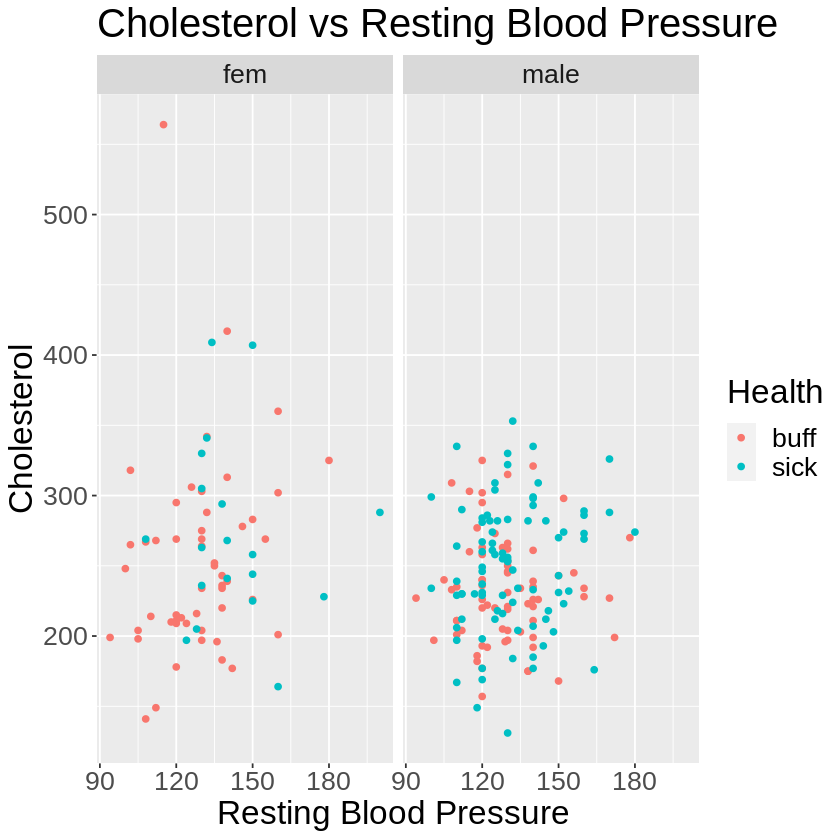

In [5]:

heart_data<-heart_data|>
    select(sex,resting_blood_pressure,cholesterol,health)
heart_split<-initial_split(heart_data,prop=0.75,strata=health)  
heart_train<-training(heart_split)   
heart_test<-testing(heart_split)


heart_plot<-heart_train|>
    ggplot(aes(x=resting_blood_pressure,y=cholesterol,color=health))+
        geom_point()+
        labs(x="Resting Blood Pressure ",y="Cholesterol", color="Health")+
        theme(text=element_text(size=20))+
        ggtitle("Cholesterol vs Resting Blood Pressure")+
        facet_grid(.~sex)


### Figure 1.3

In [3]:
head(heart_train)

ERROR: Error in head(heart_train): object 'heart_train' not found


### Figure 1.4

In [ ]:
head(heart_test)

### Figure 1.5

In [ ]:
heart_plot

## Methods and Results

To begin our data analysis, we began by loading the untidy data into our code and proceeded to add column names to our untidy data. After, we decided to clean up our data by compiling it into the correct columns and making sure all the data is correct and is compiled into a readable manner. We then begun to utilize the k-nearest neighbors system to help assist us in finding out if our variables were good predictors of heart disease or not. We did this by utilizing learned methods of creating training and testing data, making a recipe, creating a nearest neighbor function and workflowing it. After finding out the k-nearest neighbor, we then continued and created a plot summarizing and visualizing our data so that everyone can clearly see our findings. Furthermore, we then decided to predict our data and check the accuracy of our data by using the predict and metrics functions to do the respective processes above. Lastly, we checked which K to use by folding our heart data, and check for its accuracy before finishing off with our final graph of comparing healthy and sick patients and their cholesterol and resting blood pressure rates.


In [6]:
train_counts <- heart_train |>
    group_by(health) |>
    summarize(n = n()) 


health,n
<fct>,<int>
buff,123
sick,103


#### Figure 2.0 

In [4]:
train_counts

ERROR: Error in eval(expr, envir, enclos): object 'train_counts' not found


In [7]:
heart_recipe<-recipe(health~cholesterol+resting_blood_pressure,data=heart_train)

knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

k_vals<-tibble(neighbors=seq(2,20))

yVfold<-vfold_cv(heart_train,v=10,strata = health)

knn_results<-workflow()|>
  add_recipe(heart_recipe)|>
  add_model(knn_tune)|>
  tune_grid(resamples=yVfold,grid=k_vals)|>
  collect_metrics()


neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
2,accuracy,binary,0.4761364,10,0.02940076,Preprocessor1_Model01
2,roc_auc,binary,0.5035460,10,0.04711020,Preprocessor1_Model01
3,accuracy,binary,0.5602273,10,0.03953633,Preprocessor1_Model02
3,roc_auc,binary,0.5489394,10,0.04777610,Preprocessor1_Model02
4,accuracy,binary,0.5556818,10,0.03700184,Preprocessor1_Model03
4,roc_auc,binary,0.5393502,10,0.04804870,Preprocessor1_Model03


#### Figure 2.1

In [ ]:
head(knn_results)

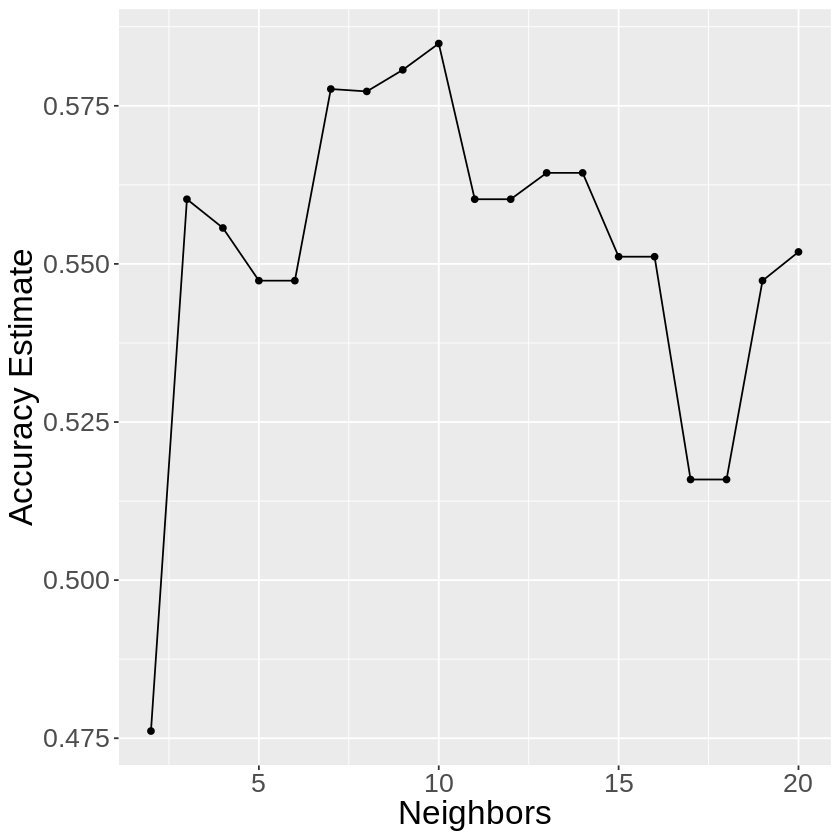

In [8]:
accuracy<-knn_results|>
  filter(.metric=="accuracy")

cross_val_plot <- accuracy|>
    ggplot(aes(x = neighbors, y = mean))+
        geom_point()+
        geom_line()+
        labs(x="Neighbors", y = "Accuracy Estimate")+ 
        theme(text=element_text(size=20))


#### Figure 2.2

In [5]:
cross_val_plot

ERROR: Error in eval(expr, envir, enclos): object 'cross_val_plot' not found


In [9]:
knn_spec<-nearest_neighbor(weight_func="rectangular",neighbors=10)|>
      set_engine("kknn")|>
      set_mode("classification")

heart_fit<-workflow()|>
      add_recipe(heart_recipe)|>
      add_model(knn_spec)|>
      fit(data=heart_train)
heart_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(10,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.460177
Best kernel: rectangular
Best k: 10

In [10]:
heart_test_predictions<-predict(heart_fit,heart_test)|>
    bind_cols(heart_test)


heart_prediction_accuracy<-heart_test_predictions|>
    metrics(truth=health,estimate=.pred_class)|>
    filter(.metric == "accuracy")


conf_matrix <- heart_test_predictions |>
    conf_mat(truth = health, estimate = .pred_class)


.pred_class,sex,resting_blood_pressure,cholesterol,health
<fct>,<chr>,<dbl>,<dbl>,<fct>
buff,male,145,233,buff
sick,fem,120,354,buff
buff,male,140,203,sick
sick,fem,140,294,buff
buff,male,130,206,sick
buff,fem,120,219,buff


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.5064935


          Truth
Prediction buff sick
      buff   22   18
      sick   20   17

#### Figure 2.3

In [ ]:
head(heart_test_predictions)

#### Figure 2.4

In [ ]:
head(heart_prediction_accuracy)

#### Figure 2.5

In [ ]:
conf_matrix

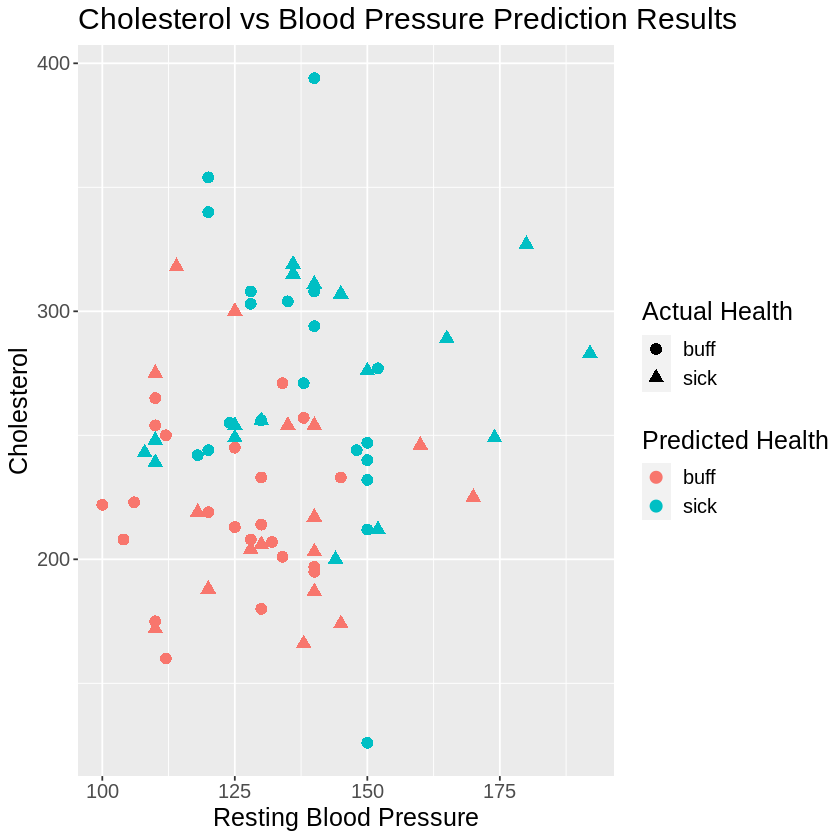

In [11]:
heart_predict_plot <- heart_test_predictions |>
    ggplot(aes(x = resting_blood_pressure, y = cholesterol, color = .pred_class,shape=health)) +
    geom_point(size = 3) +
    labs(x = "Resting Blood Pressure", y = "Cholesterol", color = "Predicted Health",shape="Actual Health") +
    theme(text = element_text(size=15)) +
    ggtitle("Cholesterol vs Blood Pressure Prediction Results")


#### Figure 2.6

In [ ]:
heart_predict_plot

### Plots of inital data and predicted results

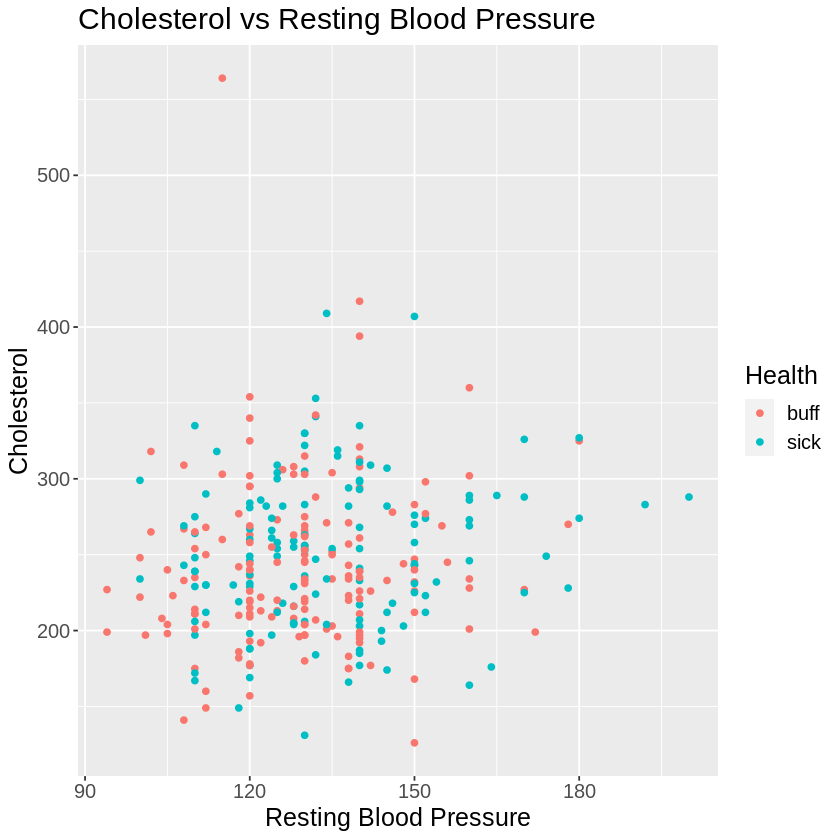

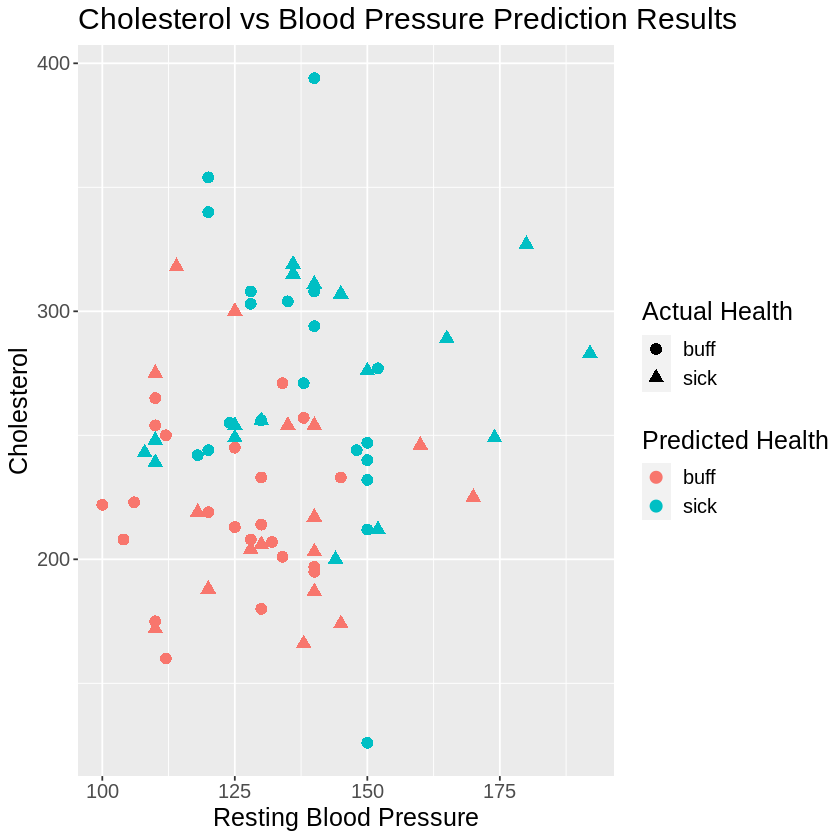

In [12]:
heart_data_plot <- heart_data |>
    ggplot(aes(x = resting_blood_pressure, y = cholesterol, color = health)) +
    geom_point() +
    labs(x = "Resting Blood Pressure", y = "Cholesterol", color = "Health") +
    theme(text = element_text(size=15)) +
    ggtitle("Cholesterol vs Resting Blood Pressure ")


#### Figure 3.0

In [6]:
heart_data_plot
heart_predict_plot

ERROR: Error in eval(expr, envir, enclos): object 'heart_data_plot' not found


## Discussion

Overall, we found that resting blood pressure was not an ideal way of classifying people who are healthy and people who are sick with some form of heart disease. Ultimately, the spread between healthy and sick were simply too close to each other to draw any meaningful conclusions or justifiable assumptions based on the data. This is exhibited by the nearly zero correlation between resting blood pressure and someone’s health status. Furthermore, the difference between male and female data shows little correlation between gender and the increased prevalence of heart disease in either gender. However, it is important to note that very large amount of females who were healthy had a wide range of cholesterol, which is significant as it signifies that cholesterol levels can vary a lot while having little to no impact to someone’s heart health, especially in females. 

In totality, we definitely were not expecting the results we encountered as we were almost certain that either on their own, or a mixture of both, that cholesterol and blood pressure would have some sort of effect on someone’s heart health. We were rather stunned by the data and its suggestion that resting blood pressure and cholesterol levels, have minimal amount of effect in increasing the risk of people developing some form of heart disease.

### Future Questions
Are there any variables we are not aware of that may have impacted whether or not the patients had heart disease? It is known that heart disease is inherited, do the patients’ families have any pre existing heart disease history? This variable can introduce factors which could affect the outcome. Smoking is a well-established risk factor for heart disease, and accounting for this variable can enhance the accuracy of the analysis. Additionally, Excessive alcohol intake can contribute to heart-related issues and understanding this variable is crucial for a thorough analysis. Considering these lifestyle and behavioral factors can help identify potential correlations between certain habits and the presence of heart disease. Additionally, it allows for a more holistic approach in understanding the multifaceted nature of cardiovascular health. As these factors are often modifiable, insights gained from their analysis can also inform potential interventions and lifestyle modifications for preventing or managing heart disease.


## References

Janosi, Andras, Steinbrunn,William, Pfisterer,Matthias, and Detrano,Robert. (1988). Heart Disease. UCI Machine Learning Repository. https://doi.org/10.24432/C52P4X.

CDC. (2023, August 29). High Blood Pressure Symptoms, Causes, and Problems | cdc.gov. Centers for Disease Control and Prevention. https://www.cdc.gov/bloodpressure/about.htm

Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J.-J., Sandhu, S., Guppy, K. H., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. The American Journal of Cardiology, 64(5), 304–310. https://doi.org/10.1016/0002-9149(89)90524-9

High cholesterol—Symptoms and causes—Mayo Clinic. (n.d.). Retrieved December 5, 2023, from https://www.mayoclinic.org/diseases-conditions/high-blood-cholesterol/symptoms-causes/syc-20350800

Multiple Cause of Death Data on CDC WONDER. (n.d.). Retrieved December 4, 2023, from https://wonder.cdc.gov/mcd.html